# Linear regression and gradient descent

In [31]:
def make_linear_regression_model(theta0, theta1):
    def f(x):
        return theta0 + theta1 * x
    return f

def cost(model, xs, ys):
    sum = 0
    for i in range(0, len(xs)):
        sum += (model(xs[i]) - ys[i]) ** 2
    return sum / len(xs)

import numpy as np

number_of_samples = 100
xs = np.random.rand(number_of_samples)
ys = 5*xs + 3.68 + np.random.rand(number_of_samples)*0.5
xs = xs.tolist()
ys = ys.tolist()

cost(make_linear_regression_model(theta0=3.68, theta1=5), xs, ys)

0.09604996793089547

3.951070677897831 + x*4.997049155742869


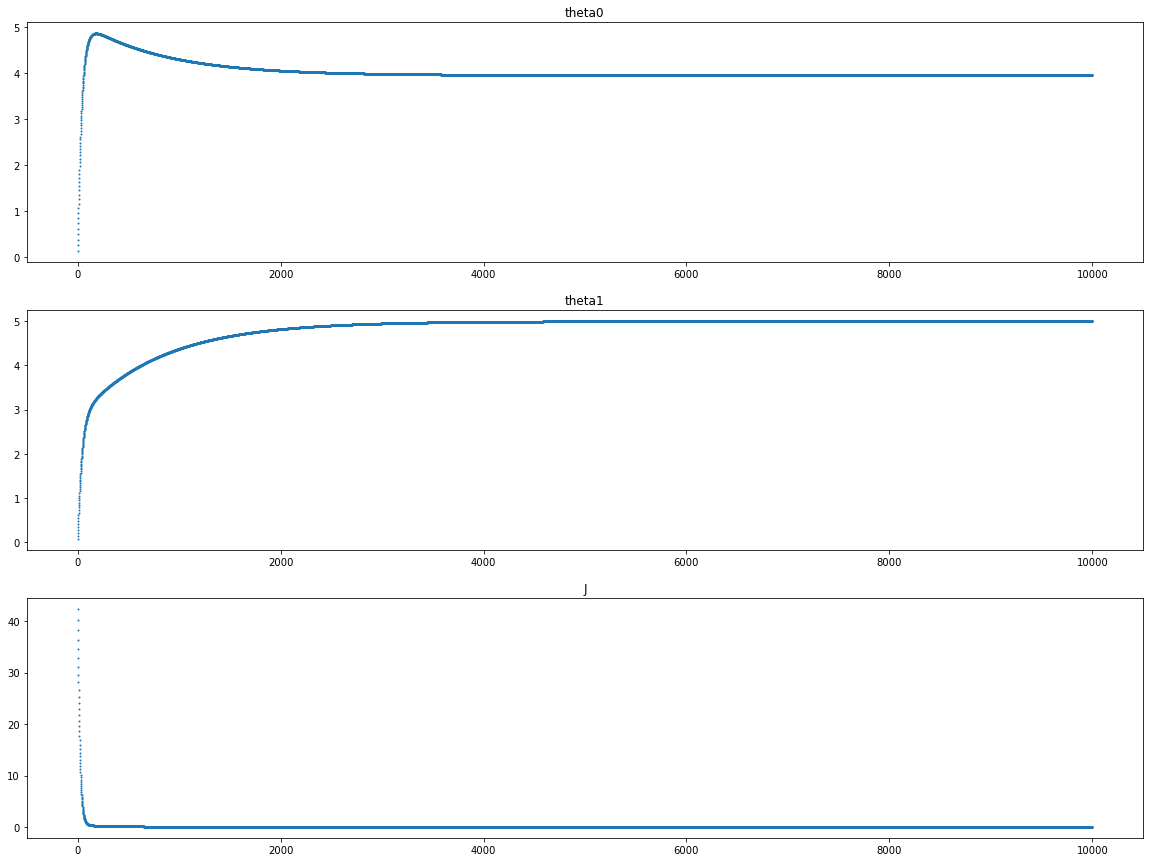

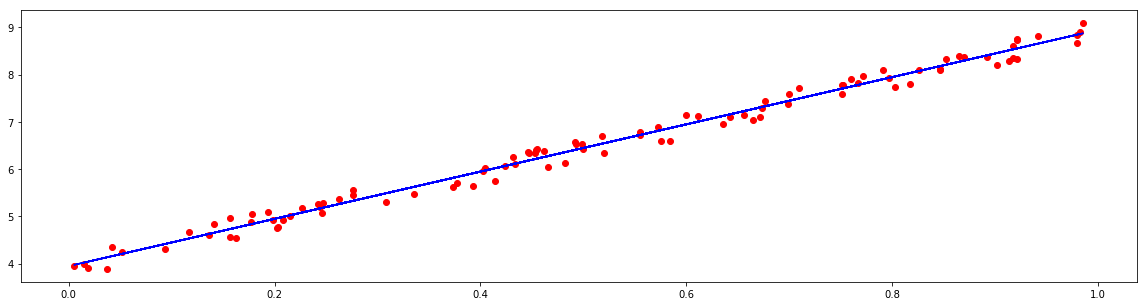

In [32]:
def gradient_descent(make_model, rate, dtheta, iterations, xs, ys):    
    theta0 = 0
    theta1 = 0
    history = []
    for i in range(0, iterations):
        d_theta0_model_left = make_model(theta0-dtheta/2, theta1)
        d_theta0_model_right = make_model(theta0+dtheta/2, theta1)
        d_theta0 = (cost(d_theta0_model_right, xs, ys) - cost(d_theta0_model_left, xs, ys)) / dtheta
        
        d_theta1_model_left = make_model(theta0, theta1-dtheta/2)
        d_theta1_model_right = make_model(theta0, theta1+dtheta/2)
        d_theta1 = (cost(d_theta1_model_right, xs, ys) - cost(d_theta1_model_left, xs, ys)) / dtheta
        
        theta0 -= rate * (1/len(xs))*d_theta0
        theta1 -= rate * (1/len(xs))*d_theta1
        
        history.append((i, theta0, theta1))
        
    return history

history = gradient_descent(
    make_model=make_linear_regression_model, 
    rate=1, 
    dtheta=0.01, 
    iterations=10000, 
    xs=xs, 
    ys=ys)

(_, theta0, theta1) = history[-1]
print(f'{theta0} + x*{theta1}')

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
plt.title('theta0')
plt.scatter([x[0] for x in history], [x[1] for x in history], s=1)

plt.subplot(3, 1, 2)
plt.title('theta1')
plt.scatter([x[0] for x in history], [x[2] for x in history], s=1)

plt.subplot(3, 1, 3)
plt.title('J')
plt.scatter([x[0] for x in history], [cost(make_linear_regression_model(x[1], x[2]), xs, ys) for x in history], s=1)

plt.show()

plt.figure(figsize=(20, 5))
plt.scatter(xs, ys, color='r')
plt.plot(xs, [theta0+theta1*x for x in xs], color='b')
plt.show()